In [20]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tqdm import tqdm

In [159]:
%matplotlib inline

In [319]:
class KMeans:
    def __init__(self, k: int=3):
        self.k = k
        
    def fit(self, X: ndarray, return_clusters: bool = False):
        self.n_samples, self.n_features = X.shape
        
        # initialize the cluster centroids randomly
        self.centroids: ndarray = X[np.random.choice(self.n_samples, size=self.k, replace=False)]
        # print(self.centroids)
        
        if return_clusters:
            self.history = []
        
        while True:
            # assign all the points to its nearest centroid
            distances: ndarray = np.zeros((self.n_samples, self.k))
            
            for i in range(self.k):
                distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
            
            # cluster labels of the each row in the data
            self.labels: ndarray = np.argmin(distances, axis=1)
            
            if return_clusters:
                self.history.append((self.labels, self.centroids))
            
            # update the centroids
            new_centroids: ndarray = np.empty((self.k, self.n_features))
            for i in range(self.k):
                new_centroids[i] = np.mean(X[self.labels == i], axis=0)

            
            # check if the centroids are not improving then stop
            if np.allclose(self.centroids, new_centroids):
                break
             
            self.centroids = new_centroids
    
    def cost_function(self):
        """ Cost function """
        
        return np.sum([np.sum(np.linalg.norm(X[self.labels == i] - self.centroids[i], axis=1)) for i in range(self.k)])
    
    def xb(self):
        "Xie Beni Index"
        # dist_matrix = np.zeros((self.centroids.shape[0], self.centroids.shape[0]))
        # for i in range(self.centroids.shape[0]):
        #     for j in range(self.centroids.shape[0]):
        #         if i != j:
        #             dist_matrix[i][j] = np.linalg.norm(self.centroids[i] - self.centroids[j])
        
        diff = self.centroids[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]
        dist_matrix = np.tril(np.sqrt(np.sum(np.power(diff, 2), axis=2)))
                    
        min_value = np.min(dist_matrix[np.nonzero(dist_matrix)])
        
        result = self.cost_function() / (self.n_samples * min_value)
        return result

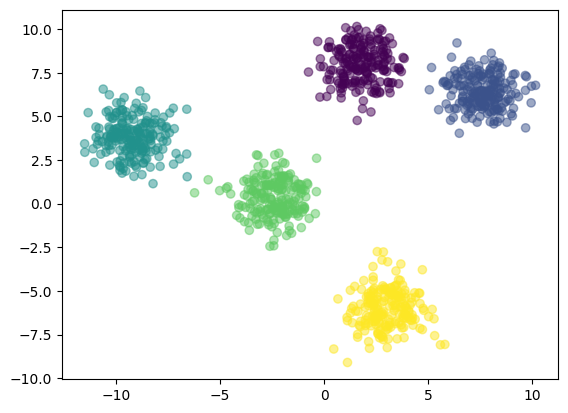

In [320]:
X, labels = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=20)

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.show()

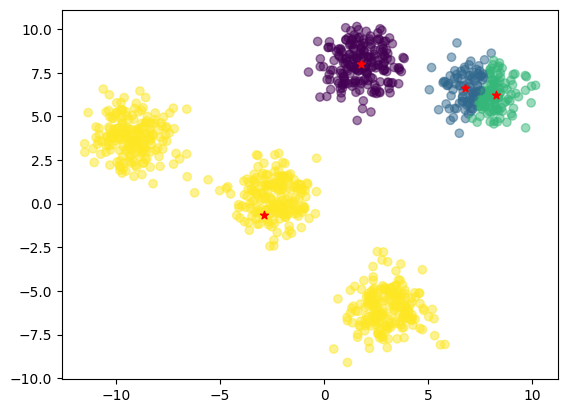

In [321]:
kmeans = KMeans(k=4)
kmeans.fit(X, return_clusters=True)
labels = kmeans.labels
centroids = kmeans.centroids
history = kmeans.history


# plot the final result
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="*")
plt.show()

In [322]:
kmeans.cost_function()

3938.3680102963945

In [323]:
kmeans.xb()

2.511599895567321

In [324]:
len(history)

10

In [290]:
# plot the process
# plt.figure(figsize=(12, 4))
# for i, h in enumerate(history):
#     plt.subplot(len(history) // 4 + 1, 4, i + 1)
#     plt.scatter(X[:, 0], X[:, 1], c=h[0], alpha=0.5)
#     plt.scatter(h[1][:, 0], h[1][:, 1], c="red", marker="*")

## Plot the Cost Function `J` v/s `k`

In [325]:
js = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    kmeans = KMeans(k=i)
    kmeans.fit(X)
    js.append(kmeans.cost_function())
    
print(js)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.98it/s]

[5951.747096563811, 3112.608372812836, 3053.2535761412064, 1258.3293288997143, 1964.5596127807776, 1137.9852910502132, 1099.6345984117584, 1089.5777078910496, 1016.6094106397159, 950.0027559066456, 958.8020108865132, 906.6977206351534, 892.5906338859909, 821.6719088397351, 800.4886964302073, 834.0835852295869, 801.9573670096711, 765.2117334281367, 740.6276075096504, 714.7529551144765, 766.3762255513603, 672.8331533566086, 684.8492829557372, 743.845055085248, 657.2623530448004, 645.8222070336456, 645.0511071975302, 635.2707146449046, 615.1238666812201, 688.1247595382077]


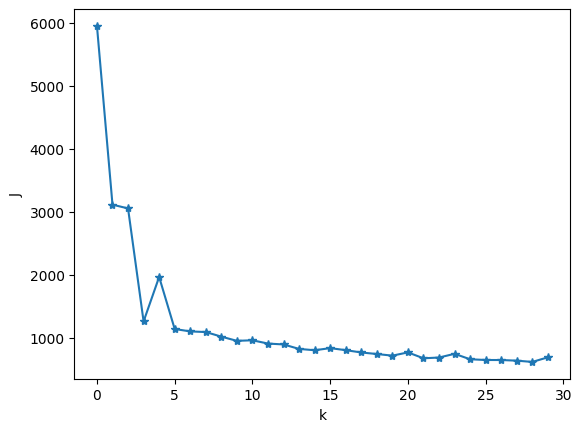

In [326]:
plt.plot(range(len(js)), js, "-*")
plt.xlabel("k")
plt.ylabel("J")

plt.show()

---
## Xie-Beni Index
> validity index to get the value of `k`

$$
XB = \frac{\sum\limits_{k=1}^{K} \sum\limits_{x\in C_k} d^2(x, m_k)}{n\times min_{i\neq j} \{d^2(m_i, m_j)\}}
$$

In [330]:
xbs = []
for i in tqdm(range(2, int(np.ceil(np.sqrt(X.shape[0]))))):
    kmeans = KMeans(k=i)
    kmeans.fit(X)
    xbs.append(kmeans.xb())
    
print(xbs)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.15it/s]

[0.5549661726833289, 0.26595953757261376, 0.3845453527948257, 0.20779782795029975, 0.725760143912488, 0.7631959722634621, 0.6395063286565313, 0.7671458861083206, 0.6576716184806749, 0.7056085961978651, 0.5989747686608482, 0.8651882609846675, 0.7937556686462727, 0.6498058421191364, 0.5629185039241004, 0.7346888831903619, 0.702161385153178, 0.9928177380607283, 0.6337023610819085, 0.66563156032181, 0.5789887117556902, 0.7151992642878365, 0.6225324355198635, 0.7156163511030537, 0.5156713697737638, 0.6792395514337249, 0.6442122057436785, 0.9906407233969827, 0.7319101830199994, 0.922596463742927]


In [331]:
print(f"The value of the k is using XB index is: {2 + np.argmin(xbs)}")

The value of the k is using XB index is: 5


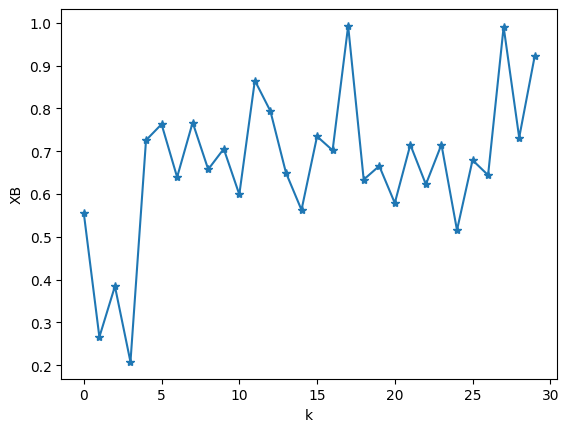

In [332]:
plt.plot(range(len(xbs)), xbs, "-*")
plt.xlabel("k")
plt.ylabel("XB")

plt.show()